In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras
from keras.utils import plot_model

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os


In [ ]:
base_dir = '/content/drive/MyDrive/flowers'

img_size = 224
batch = 64




In [ ]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 3495 images belonging to 5 classes.
Found 871 images belonging to 5 classes.


In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
				activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

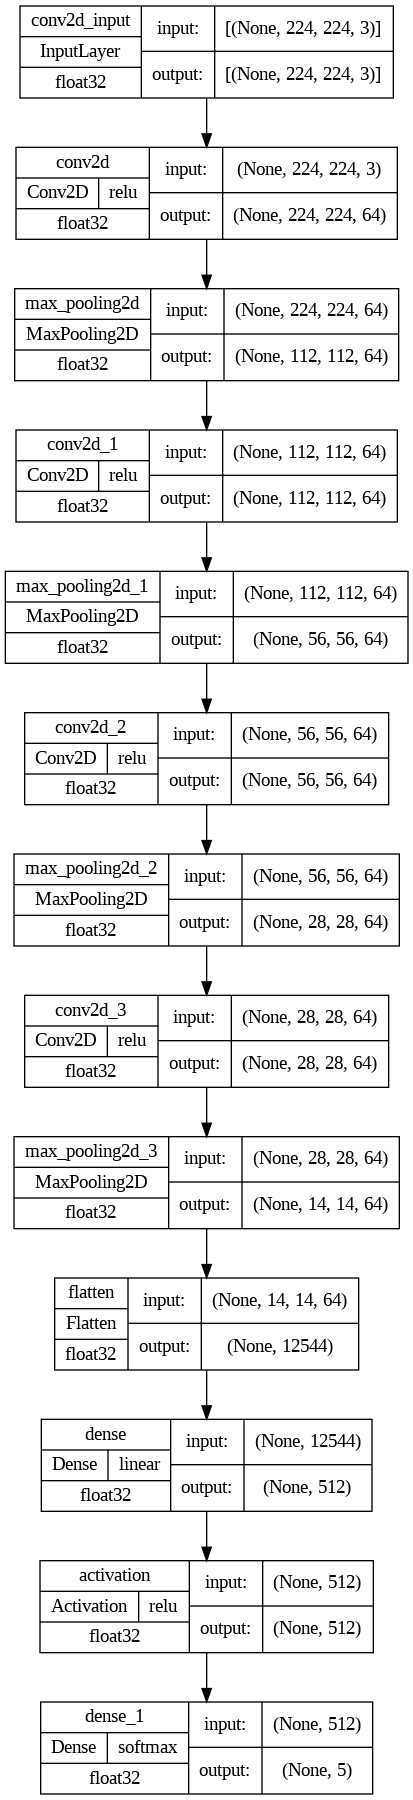

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs=50
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/50
55/55 [==============================] - 75s 1s/step - loss: 0.9277 - accuracy: 0.6386 - val_loss: 0.9633 - val_accuracy: 0.6556
Epoch 2/50
55/55 [==============================] - 66s 1s/step - loss: 0.8633 - accuracy: 0.6604 - val_loss: 0.8621 - val_accuracy: 0.6762
Epoch 3/50
55/55 [==============================] - 65s 1s/step - loss: 0.8148 - accuracy: 0.6881 - val_loss: 0.9335 - val_accuracy: 0.6269
Epoch 4/50
55/55 [==============================] - 64s 1s/step - loss: 0.7552 - accuracy: 0.7087 - val_loss: 0.8548 - val_accuracy: 0.6866
Epoch 5/50
55/55 [==============================] - 65s 1s/step - loss: 0.7118 - accuracy: 0.7353 - val_loss: 0.8219 - val_accuracy: 0.6946
Epoch 6/50
55/55 [==============================] - 64s 1s/step - loss: 0.6668 - accuracy: 0.7451 - val_loss: 0.8345 - val_accuracy: 0.6854
Epoch 7/50
55/55 [==============================] - 65s 1s/step - loss: 0.6229 - accuracy: 0.7568 - val_loss: 0.8143 - val_accuracy: 0.7003
Epoch 8/50
55/55 [==

In [ ]:
from tensorflow.keras.models import load_model
model.save('OutputFlower.h5')


model.save('/content/drive/MyDrive/OutputFlowers/OutputFlower.h5')

# load model
savedModel=load_model('/content/drive/MyDrive/OutputFlowers/OutputFlower.h5')


# **Run from here**

In [2]:

# load model
from tensorflow.keras.models import load_model
savedModel=load_model('/content/drive/MyDrive/OutputFlowers/OutputFlower.h5')


1/1 [==============================] - 0s 223ms/step
[[0. 0. 1. 0. 0.]]
Rose


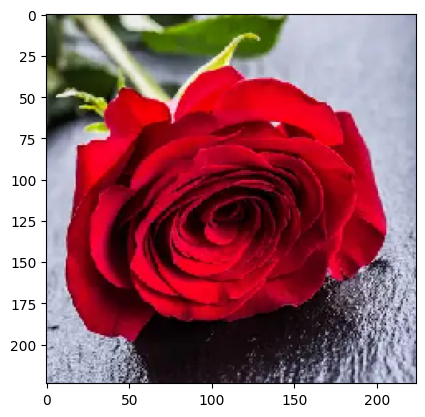

In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('/content/download.webp',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
	  print(list_[i])
	  break


1/1 [==============================] - 0s 39ms/step
[[0. 1. 0. 0. 0.]]
Danelion


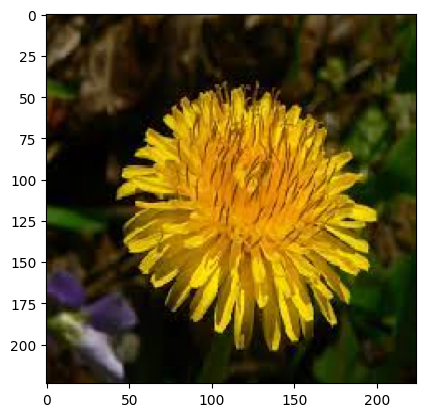

In [9]:
#Input image
test_image = image.load_img('/content/download.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
	  print(list_[i])
	  break


1/1 [==============================] - 0s 40ms/step
[[1. 0. 0. 0. 0.]]
Daisy


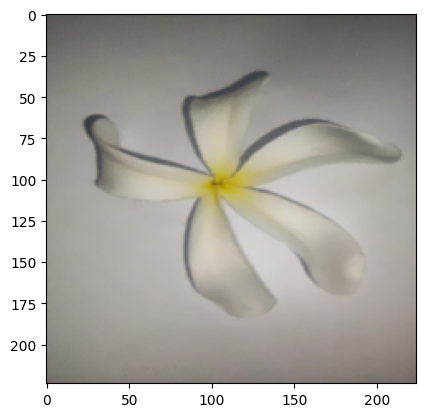

In [5]:
#Input image
test_image = image.load_img('/content/img1.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
	  print(list_[i])
	  break
